## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.

mouse_count = merge_df["Mouse ID"].nunique()
print(f"There are {mouse_count} mice in the merged data set")

There are 249 mice in the merged data set


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

find_duplicate_MouseID = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"],keep=False)]
find_duplicate_MouseID[["Mouse ID"]]

,Mouse ID
107,g989
137,g989
329,g989
360,g989
620,g989
681,g989
815,g989
869,g989
950,g989
1111,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

find_duplicate_MouseID = merge_df[merge_df["Mouse ID"] == "g989"]
find_duplicate_MouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrama by dropping the duplicate mouse by its ID.

clean_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_count = clean_df["Mouse ID"].nunique()
print(f"There are {clean_mouse_count} mice in the clean data set")

There are 248 mice in the clean data set


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

treatment_groups_df = clean_df.groupby(["Drug Regimen"])


treatment_mean = treatment_groups_df["Tumor Volume (mm3)"].mean()
treatment_median = treatment_groups_df["Tumor Volume (mm3)"].median()
treatment_variance = treatment_groups_df["Tumor Volume (mm3)"].var()
treatment_std = treatment_groups_df["Tumor Volume (mm3)"].std()
treatment_SEM = treatment_groups_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame ({
    "Mean": treatment_mean,
    "Median": treatment_median,
    "Variance": treatment_variance,
    "Standard Deviation": treatment_std,
    "SEM": treatment_SEM    
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

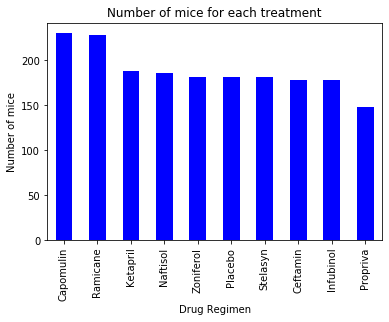

In [10]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 

mouse_counts_per_drug = clean_df["Drug Regimen"].value_counts()

treatment_chart = mouse_counts_per_drug.plot(kind='bar', title="Number of mice for each treatment", facecolor="blue")
treatment_chart.set_xlabel("Drug Regimen")
treatment_chart.set_ylabel("Number of mice")
plt.show()

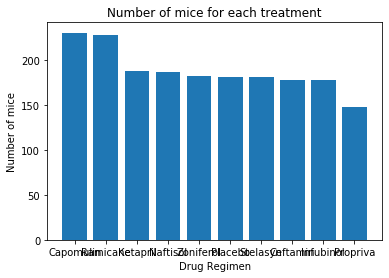

In [11]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.

mouse_counts_per_drug = clean_df["Drug Regimen"].value_counts()

plt.bar(mouse_counts_per_drug.index.values,mouse_counts_per_drug.values)

plt.title("Number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()

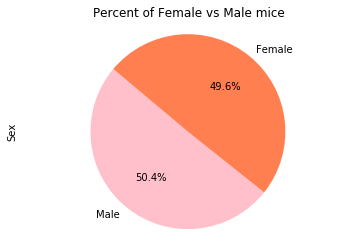

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_mice = clean_df.loc[clean_df["Sex"] == "Male"]
male_count = male_mice["Mouse ID"].nunique()
female_mice = clean_df.loc[clean_df["Sex"] == "Female"]
female_count = female_mice["Mouse ID"].nunique()

gender_dict = {'Sex': [male_count, female_count]}
gender_df = pd.DataFrame(data=gender_dict, index = ["Male","Female"])

gender_df.plot(kind='pie', y='Sex', legend = False, title="Percent of Female vs Male mice",startangle=140, autopct='%1.1f%%',colors =["pink","coral"])

plt.axis("equal")

plt.show()

([<matplotlib.patches.Wedge at 0x7f9db63e0150>,
 [Text(-0.6963355017006471, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.37981936456398924, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

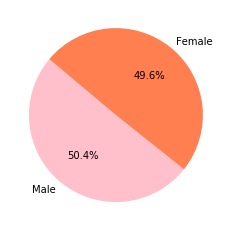

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_mice = clean_df.loc[clean_df["Sex"] == "Male"]
male_count = male_mice["Mouse ID"].nunique()
female_mice = clean_df.loc[clean_df["Sex"] == "Female"]
female_count = female_mice["Mouse ID"].nunique()

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["pink", "coral"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

## only want to keep the rows with the four_treaments listed above
treatments_df = clean_df[clean_df['Drug Regimen'].isin(four_treatments)]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(clean_df, treatments_df.groupby(["Mouse ID"])["Timepoint"].max(), on="Mouse ID")
merge_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,45
810,m601,30,31.758275,1,Capomulin,Male,22,17,45
811,m601,35,30.834357,1,Capomulin,Male,22,17,45
812,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
